# 한국 지역의 노령화 지수 고령 인구 유소년 인구 및 총인구수 관련 데이터 분석

## 데이터 연결

### 필요 라이브러리 임포트

In [1]:
# 구글 드라이브 연동

from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# 전처리 및 분석을 위한 라이브러리 선언
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [3]:
# 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

### CSV 파일 불러오기

In [4]:
data = pd.read_csv('/content/gdrive/MyDrive/빅데이터분석/경상남도 김해시_통계지수_노령화지수_20211231.csv',encoding = 'CP949')

In [5]:
df = data.copy()

## 데이터 전처리

In [6]:
# 데이터의 상단 5개 출력
df.head()

,통계연도,시도명,시군구명,노령화지수(퍼센트),고령인구(65세 이상),유소년(14세 이하),총인구수(명)
0,2017,서울특별시,종로구,180.6,26030,14416,154770
1,2017,서울특별시,중구,187.1,21148,11306,125709
2,2017,서울특별시,용산구,157.5,36488,23174,229161
3,2017,서울특별시,성동구,122.0,41152,33732,304808
4,2017,서울특별시,광진구,116.9,43790,37469,357703


In [7]:
# 데이터의 상세 정보 출력
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   통계연도          1300 non-null   int64  
 1   시도명           1300 non-null   object 
 2   시군구명          1300 non-null   object 
 3   노령화지수(퍼센트)    1300 non-null   float64
 4   고령인구(65세 이상)  1300 non-null   int64  
 5   유소년(14세 이하)   1300 non-null   int64  
 6   총인구수(명)       1300 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 71.2+ KB


데이터의 결측치 없음 확인

In [8]:
# 데이터의 중복 확인

df.duplicated().sum()


0

데이터 중복값 없음 확인

## 데이터 시각화

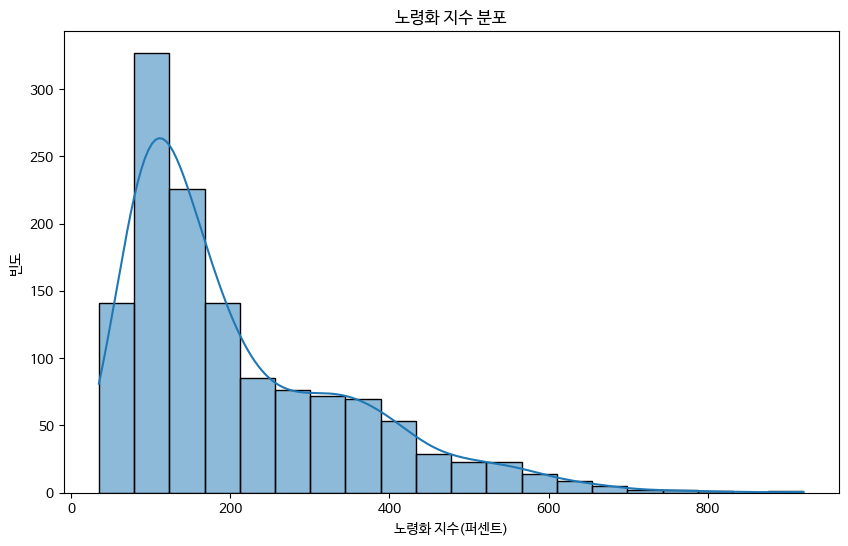

In [9]:
# 노령화 지수 분포
plt.figure(figsize=(10, 6))
sns.histplot(df['노령화지수(퍼센트)'], bins=20, kde=True)
plt.title('노령화 지수 분포')
plt.xlabel('노령화 지수(퍼센트)')
plt.ylabel('빈도')
plt.show()

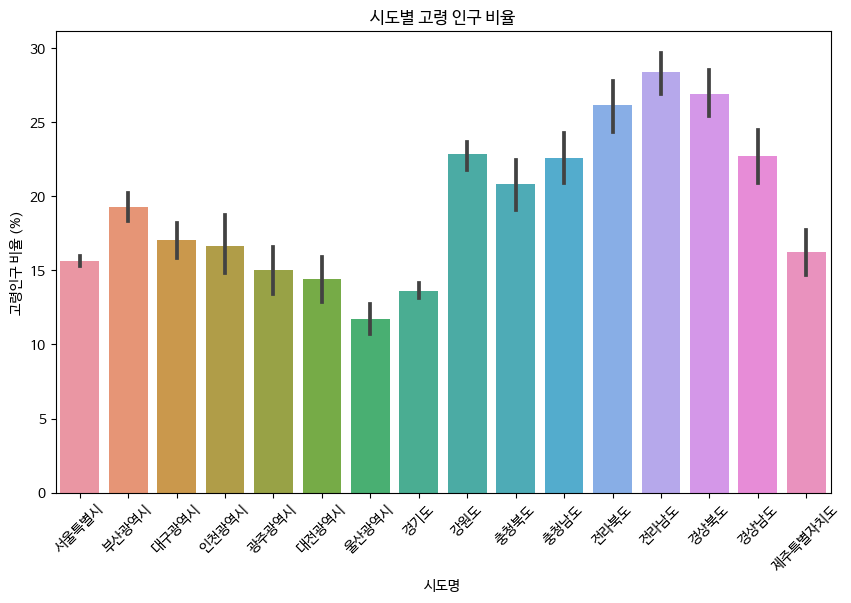

In [11]:
# 시도 별 고령 인구 비율
df['고령인구 비율'] = df['고령인구(65세 이상)'] / df['총인구수(명)'] * 100
plt.figure(figsize=(10, 6))
sns.barplot(x='시도명', y='고령인구 비율', data=df)
plt.title('시도별 고령 인구 비율')
plt.xticks(rotation=45)
plt.xlabel('시도명')
plt.ylabel('고령인구 비율 (%)')
plt.show()

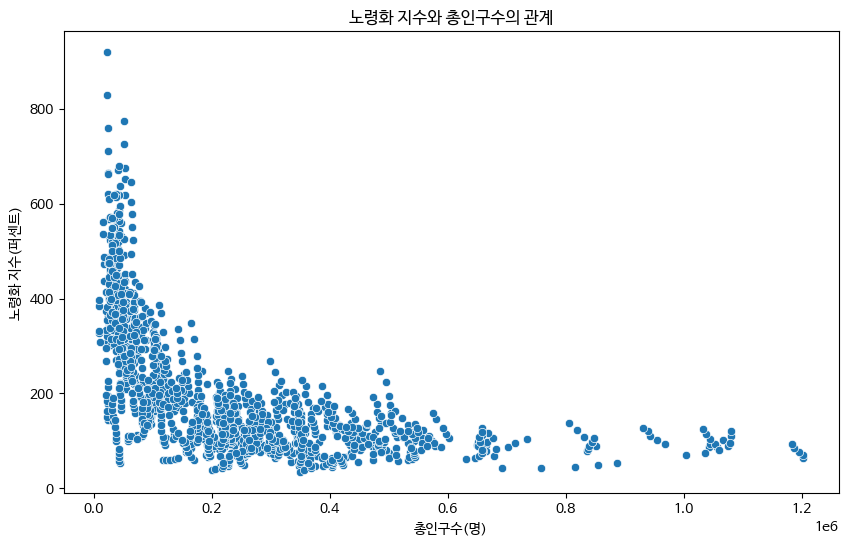

In [12]:
# 노령화 지수와 총 인구수와의 관계
plt.figure(figsize=(10, 6))
sns.scatterplot(x='총인구수(명)', y='노령화지수(퍼센트)', data=df)
plt.title('노령화 지수와 총인구수의 관계')
plt.xlabel('총인구수(명)')
plt.ylabel('노령화 지수(퍼센트)')
plt.show()

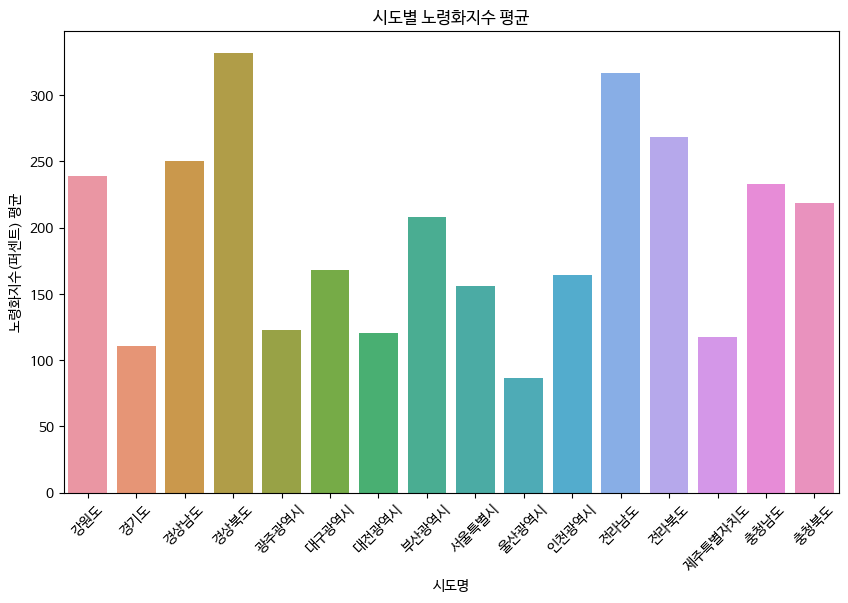

In [16]:
# 시도별 노령화 지수 평균
avg_aging_index_by_city = df.groupby('시도명')['노령화지수(퍼센트)'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='시도명', y='노령화지수(퍼센트)', data=avg_aging_index_by_city)
plt.xticks(rotation=45)
plt.title('시도별 노령화지수 평균')
plt.xlabel('시도명')
plt.ylabel('노령화지수(퍼센트) 평균')
plt.show()

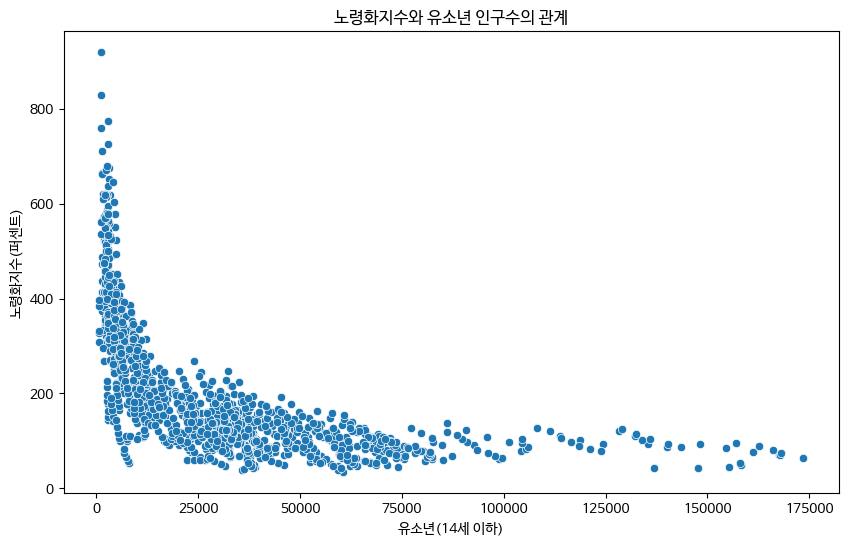

In [18]:
#노령화지수와 유소년 인구수의 관계를 나타내는 산점도
plt.figure(figsize=(10, 6))
sns.scatterplot(x='유소년(14세 이하)', y='노령화지수(퍼센트)', data=df)
plt.title('노령화지수와 유소년 인구수의 관계')
plt.xlabel('유소년(14세 이하)')
plt.ylabel('노령화지수(퍼센트)')
plt.show()